# Statistical Analysis of Movie Ratings Dataset

This notebook performs comprehensive statistical analysis on the Movies and TV ratings dataset.

## Table of Contents
1. [Import Dependencies](#1.-Import-Dependencies)
2. [Data Loading and Preprocessing](#2.-Data-Loading-and-Preprocessing)
3. [Dataset Statistics](#3.-Dataset-Statistics)
4. [Rating Analysis](#4.-Rating-Analysis)
5. [User and Item Grouping](#5.-User-and-Item-Grouping)
6. [Target Selection](#6.-Target-Selection)
7. [Similarity Analysis](#7.-Similarity-Analysis)
8. [Save Results](#8.-Save-Results)

## 1. Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from collections import defaultdict

# Configure matplotlib
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 5)

## 2. Data Loading and Preprocessing

In [2]:
# Configuration
DATA_PATH = "C:/Users/elswe/OneDrive/سطح المكتب/IRS Project/AIE425_FinalProject_Group X/AIE425_Intelligent Recommender Systems/SECTION1_DimensionalityReduction/data/Movies_and_TV.csv"
COLUMN_NAMES = ['item_id', 'user_id', 'rating', 'timestamp']

# Load dataset
ratings_df = pd.read_csv(DATA_PATH, header=None, names=COLUMN_NAMES)
print(f"Original dataset shape: {ratings_df.shape}")
ratings_df.head()

Original dataset shape: (8765568, 4)


,item_id,user_id,rating,timestamp
0,0001527665,A3478QRKQDOPQ2,5.0,1362960000
1,0001527665,A2VHSG6TZHU1OB,5.0,1361145600
2,0001527665,A23EJWOW1TLENE,5.0,1358380800
3,0001527665,A1KM9FNEJ8Q171,5.0,1357776000
4,0001527665,A38LY2SSHVHRYB,4.0,1356480000


In [3]:
def handle_duplicate_ratings(df: pd.DataFrame) -> pd.DataFrame:
    """
    Handle duplicate user-item pairs by averaging their ratings.
    
    Args:
        df: DataFrame with columns ['user_id', 'item_id', 'rating']
    
    Returns:
        DataFrame with unique user-item pairs and averaged ratings
    """
    aggregated_df = df.groupby(['user_id', 'item_id'], as_index=False).agg({
        'rating': 'mean'
    })
    return aggregated_df


# Process duplicates
ratings_df = handle_duplicate_ratings(ratings_df)
print(f"Dataset shape after handling duplicates: {ratings_df.shape}")

Dataset shape after handling duplicates: (8506849, 3)


In [4]:
def filter_top_users_and_items(
    df: pd.DataFrame,
    top_n_items: int = 10000,
    top_n_users: int = 100000
) -> pd.DataFrame:
    """
    Filter dataset to keep only top N items and top N users by rating count.
    
    Args:
        df: Ratings DataFrame
        top_n_items: Number of top items to keep
        top_n_users: Number of top users to keep
    
    Returns:
        Filtered DataFrame
    """
    # Filter by top items
    top_item_ids = df['item_id'].value_counts().nlargest(top_n_items).index
    filtered_df = df[df['item_id'].isin(top_item_ids)]
    
    # Filter by top users
    top_user_ids = filtered_df['user_id'].value_counts().nlargest(top_n_users).index
    filtered_df = filtered_df[filtered_df['user_id'].isin(top_user_ids)]
    
    return filtered_df


# Apply filtering
ratings_df = filter_top_users_and_items(ratings_df)

print("Dataset Statistics after Filtering:")
print(f"  - Total Ratings: {len(ratings_df):,}")
print(f"  - Unique Users: {ratings_df['user_id'].nunique():,}")
print(f"  - Unique Items: {ratings_df['item_id'].nunique():,}")

Dataset Statistics after Filtering:
  - Total Ratings: 1,523,627
  - Unique Users: 100,000
  - Unique Items: 9,999


In [5]:
# Verify rating range
min_rating = ratings_df['rating'].min()
max_rating = ratings_df['rating'].max()
print(f"Rating range: [{min_rating}, {max_rating}]")

Rating range: [1.0, 5.0]


## 3. Dataset Statistics

In [6]:
# Calculate rating counts per user
ratings_per_user = ratings_df.groupby('user_id')['rating'].count()
ratings_per_user.to_csv('number_of_ratings_for_each_user.csv')
print("Ratings per user (sample):")
ratings_per_user.head()

Ratings per user (sample):


user_id
A0040548BPHKXMHH3NTI    12
A0045750NMY09KVSTE01     7
A0070287EH1P1FHWO3GW    10
A0149220O8WD7KG3O5XR    18
A0160612BLIWRHROHLLE     7
Name: rating, dtype: int64

In [7]:
# Calculate rating counts per item
ratings_per_item = ratings_df.groupby('item_id')['rating'].count()
ratings_per_item.to_csv('number_of_ratings_for_each_item.csv')
print("Ratings per item (sample):")
ratings_per_item.head()

Ratings per item (sample):


item_id
0005019281    186
0005119367    140
0307142493     90
0375810331     45
0510539610      9
Name: rating, dtype: int64

## 4. Rating Analysis

In [8]:
# Calculate average rating per user
avg_rating_per_user = ratings_df.groupby('user_id')['rating'].mean()
avg_rating_per_user.to_csv('average_rating_per_user.csv')
print("Average rating per user (sample):")
avg_rating_per_user.head()

Average rating per user (sample):


user_id
A0040548BPHKXMHH3NTI    4.083333
A0045750NMY09KVSTE01    5.000000
A0070287EH1P1FHWO3GW    4.600000
A0149220O8WD7KG3O5XR    4.500000
A0160612BLIWRHROHLLE    4.142857
Name: rating, dtype: float64

In [9]:
# Calculate average rating per item
avg_rating_per_item = ratings_df.groupby('item_id')['rating'].mean()
avg_rating_per_item.to_csv('average_rating_per_item.csv')
print("Average rating per item (sample):")
avg_rating_per_item.head()

Average rating per item (sample):


item_id
0005019281    4.494624
0005119367    4.764286
0307142493    4.766667
0375810331    4.511111
0510539610    4.333333
Name: rating, dtype: float64

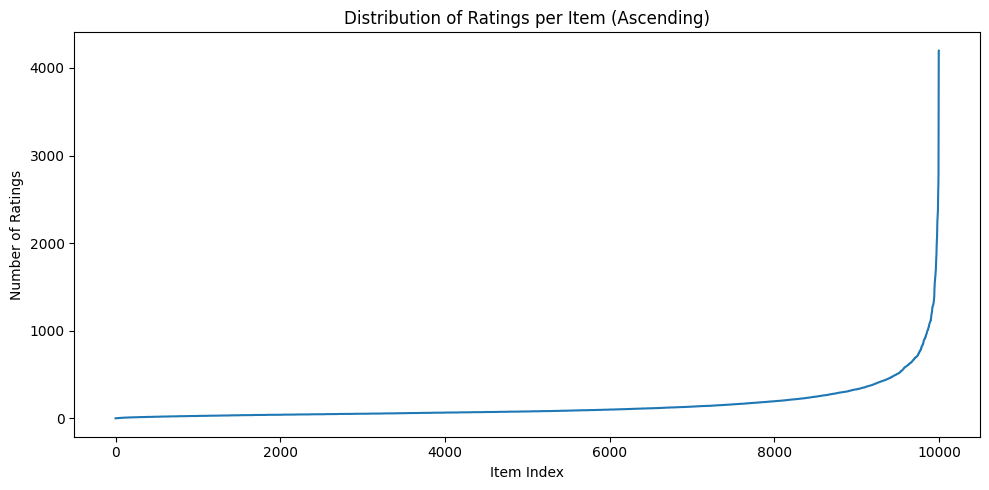

In [10]:
# Visualize distribution of ratings per item (sorted ascending)
sorted_item_counts = ratings_per_item.sort_values(ascending=True)
sorted_item_counts.to_csv('ordered_items_counts.csv')

plt.figure(figsize=(10, 5))
plt.plot(sorted_item_counts.values)
plt.title('Distribution of Ratings per Item (Ascending)')
plt.xlabel('Item Index')
plt.ylabel('Number of Ratings')
plt.tight_layout()
plt.show()

## 5. User and Item Grouping

In [11]:
def create_rating_groups(avg_ratings: pd.Series) -> pd.Series:
    """
    Categorize items into groups based on their average rating percentages.
    
    Args:
        avg_ratings: Series of average ratings per item
    
    Returns:
        Series with group labels (G1-G10)
    """
    # Convert ratings to percentage scale (1-5 -> 0-100)
    rating_percentages = (avg_ratings - 1) / 4 * 100
    
    # Define bins and labels
    bins = [0, 1, 5, 10, 20, 30, 40, 50, 60, 70, 100]
    labels = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10']
    
    groups = pd.cut(rating_percentages, bins=bins, labels=labels, include_lowest=True)
    return groups


# Create item rating groups
item_groups = create_rating_groups(avg_rating_per_item)
item_groups.to_csv('item_rating_groups.csv')

print("Items per rating group:")
item_groups.value_counts()

Items per rating group:


rating
G10    8293
G9      980
G8      436
G7      165
G6       86
G5       28
G4       11
G1        0
G2        0
G3        0
Name: count, dtype: int64

In [12]:
# Count items per group (sorted by group index)
group_item_counts = item_groups.value_counts().sort_index()
group_item_counts.to_csv('group_counts_index.csv')

print("Items per group (sorted):")
group_item_counts

Items per group (sorted):


rating
G1        0
G2        0
G3        0
G4       11
G5       28
G6       86
G7      165
G8      436
G9      980
G10    8293
Name: count, dtype: int64

In [13]:
# Calculate total ratings per group
item_group_df = pd.DataFrame({
    'item_id': avg_rating_per_item.index,
    'group': item_groups.values
})

merged_df = ratings_df.merge(item_group_df, on='item_id')
ratings_count_per_group = merged_df.groupby('group', observed=False)['rating'].count().sort_index()
ratings_count_per_group.to_csv('ratings_per_group.csv')

print("Total ratings per group:")
ratings_count_per_group

Total ratings per group:


group
G1           0
G2           0
G3           0
G4         544
G5        2129
G6        6536
G7       15758
G8       54685
G9      168567
G10    1275408
Name: rating, dtype: int64

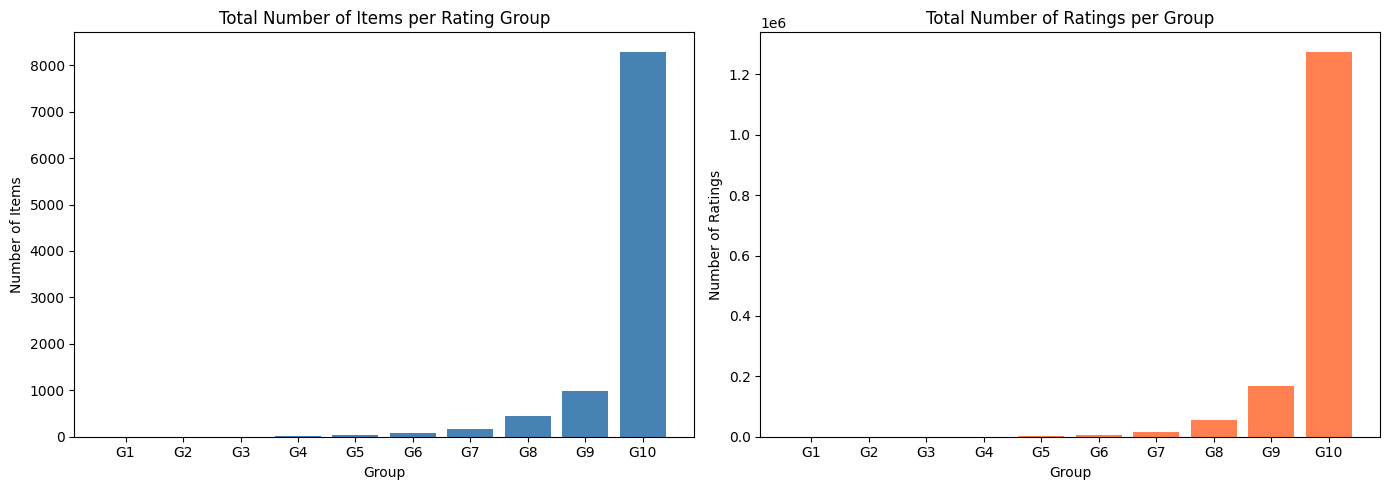

In [14]:
# Visualize group distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Items per group
axes[0].bar(group_item_counts.index, group_item_counts.values, color='steelblue')
axes[0].set_title('Total Number of Items per Rating Group')
axes[0].set_xlabel('Group')
axes[0].set_ylabel('Number of Items')

# Ratings per group
axes[1].bar(ratings_count_per_group.index, ratings_count_per_group.values, color='coral')
axes[1].set_title('Total Number of Ratings per Group')
axes[1].set_xlabel('Group')
axes[1].set_ylabel('Number of Ratings')

plt.tight_layout()
plt.show()

## 6. Target Selection

In [15]:
def select_target_users(ratings_per_user: pd.Series) -> list:
    """
    Select target users based on their rating activity percentage.
    
    Selects users from three activity tiers:
    - Low activity: <= 2% of max ratings
    - Medium activity: 2-5% of max ratings
    - High activity: 5-10% of max ratings
    
    Args:
        ratings_per_user: Series of rating counts per user
    
    Returns:
        List of selected user IDs
    """
    user_activity_pct = ratings_per_user / ratings_per_user.max() * 100
    
    def safe_first(series):
        return series.index[0] if len(series) > 0 else None
    
    # Select one user from each activity tier
    low_activity_user = safe_first(user_activity_pct[user_activity_pct <= 2])
    medium_activity_user = safe_first(
        user_activity_pct[(user_activity_pct > 2) & (user_activity_pct <= 5)]
    )
    high_activity_user = safe_first(
        user_activity_pct[(user_activity_pct > 5) & (user_activity_pct <= 10)]
    )
    
    return [u for u in [low_activity_user, medium_activity_user, high_activity_user] if u is not None]


# Select target users
target_users = select_target_users(ratings_per_user)
print(f"Target Users: {target_users}")

Target Users: ['A0040548BPHKXMHH3NTI', 'A100JCBNALJFAW', 'A10175AMUHOQC4']


In [16]:
def select_target_items(avg_rating_per_item: pd.Series, n_items: int = 2) -> list:
    """
    Select target items with lowest average ratings.
    
    Args:
        avg_rating_per_item: Series of average ratings per item
        n_items: Number of items to select
    
    Returns:
        List of selected item IDs
    """
    sorted_items = avg_rating_per_item.sort_values(ascending=True)
    return sorted_items.index[:n_items].tolist()


# Select target items
target_items = select_target_items(avg_rating_per_item)
print(f"Target Items: {target_items}")

Target Items: ['B00PCSVODW', 'B005GISDXW']


## 7. Similarity Analysis

In [17]:
def build_user_item_mappings(df: pd.DataFrame) -> tuple:
    """
    Build dictionaries mapping users to their rated items and vice versa.
    
    Args:
        df: Ratings DataFrame
    
    Returns:
        Tuple of (user_to_items, item_to_users) dictionaries
    """
    user_to_items = df.groupby('user_id')['item_id'].apply(set).to_dict()
    item_to_users = df.groupby('item_id')['user_id'].apply(set).to_dict()
    return user_to_items, item_to_users


# Build mappings
user_items_map, item_users_map = build_user_item_mappings(ratings_df)

print(f"Example - User '{target_users[0]}' rated {len(user_items_map[target_users[0]])} items")

Example - User 'A0040548BPHKXMHH3NTI' rated 12 items


In [18]:
def calculate_common_items(
    target_users: list,
    user_items_map: dict,
    all_users: list
) -> dict:
    """
    Calculate the number of common items between target users and all other users.
    
    Args:
        target_users: List of target user IDs
        user_items_map: Dictionary mapping users to their rated items
        all_users: List of all user IDs
    
    Returns:
        Dictionary {target_user: {other_user: common_count}}
    """
    common_items_count = {}
    
    for target_user in target_users:
        target_items = user_items_map.get(target_user, set())
        common_items_count[target_user] = {}
        
        for other_user in all_users:
            if other_user != target_user:
                other_items = user_items_map.get(other_user, set())
                common_count = len(target_items & other_items)
                common_items_count[target_user][other_user] = common_count
    
    return common_items_count


# Calculate common items between target users and all users
all_users = ratings_df['user_id'].unique().tolist()
common_items_between_users = calculate_common_items(target_users, user_items_map, all_users)

print("Sample of common items count:")
for user in target_users[:1]:
    sample_counts = dict(list(common_items_between_users[user].items())[:5])
    print(f"  {user}: {sample_counts}")

Sample of common items count:
  A0040548BPHKXMHH3NTI: {'A0045750NMY09KVSTE01': 0, 'A0070287EH1P1FHWO3GW': 0, 'A0149220O8WD7KG3O5XR': 0, 'A0160612BLIWRHROHLLE': 0, 'A0221881VJG1DV9M63H2': 1}


In [19]:
def calculate_common_users(
    target_items: list,
    item_users_map: dict,
    all_items: list
) -> dict:
    """
    Calculate the number of common users between target items and all other items.
    
    Args:
        target_items: List of target item IDs
        item_users_map: Dictionary mapping items to their rating users
        all_items: List of all item IDs
    
    Returns:
        Dictionary {target_item: {other_item: common_count}}
    """
    common_users_count = {}
    
    for target_item in target_items:
        target_users_set = item_users_map.get(target_item, set())
        common_users_count[target_item] = {}
        
        for other_item in all_items:
            if other_item != target_item:
                other_users = item_users_map.get(other_item, set())
                common_count = len(target_users_set & other_users)
                common_users_count[target_item][other_item] = common_count
    
    return common_users_count


# Calculate common users between target items and all items
all_items = ratings_df['item_id'].unique().tolist()
common_users_between_items = calculate_common_users(target_items, item_users_map, all_items)

print("Sample of common users count:")
for item in target_items[:1]:
    sample_counts = dict(list(common_users_between_items[item].items())[:5])
    print(f"  {item}: {sample_counts}")

Sample of common users count:
  B00PCSVODW: {'6303998240': 0, 'B000LC4ZI0': 0, 'B0013J30YU': 0, 'B003GAMOLY': 0, 'B004ISM6E8': 0}


In [20]:
def find_similar_users(
    target_users: list,
    user_items_map: dict,
    common_items_count: dict,
    threshold_ratio: float = 0.30
) -> dict:
    """
    Find similar users based on common items threshold.
    
    Args:
        target_users: List of target user IDs
        user_items_map: Dictionary mapping users to their rated items
        common_items_count: Dictionary of common item counts
        threshold_ratio: Minimum ratio of common items required
    
    Returns:
        Dictionary {target_user: [similar_users]}
    """
    similar_users = {}
    
    for target_user in target_users:
        user_item_count = len(user_items_map.get(target_user, set()))
        threshold = threshold_ratio * user_item_count
        
        similar_users[target_user] = [
            other_user
            for other_user, overlap in common_items_count[target_user].items()
            if overlap >= threshold
        ]
    
    return similar_users


# Find similar users using 30% threshold
similar_users_map = find_similar_users(
    target_users, user_items_map, common_items_between_users
)

print("Similar users found:")
for user, similar in similar_users_map.items():
    print(f"  {user}: {len(similar)} similar users")

Similar users found:
  A0040548BPHKXMHH3NTI: 12 similar users
  A100JCBNALJFAW: 26 similar users
  A10175AMUHOQC4: 0 similar users


## 8. Save Results

In [21]:
# Compile all analysis results
analysis_results = {
    "dataset": ratings_df,
    "ratings_per_user": ratings_per_user,
    "ratings_per_item": ratings_per_item,
    "avg_rating_per_user": avg_rating_per_user,
    "avg_rating_per_item": avg_rating_per_item,
    "sorted_item_counts": sorted_item_counts,
    "item_groups": item_groups,
    "group_item_counts": group_item_counts,
    "ratings_count_per_group": ratings_count_per_group,
    "target_users": target_users,
    "target_items": target_items,
    "common_items_between_users": common_items_between_users,
    "common_users_between_items": common_users_between_items,
    "similar_users_map": similar_users_map
}

# Save to pickle file
import os
os.makedirs('Statistical_Analysis', exist_ok=True)

with open('Statistical_Analysis/statistical_analysis.pkl', 'wb') as f:
    pickle.dump(analysis_results, f)

print("Analysis results saved successfully!")
print(f"\nSummary of saved data:")
for key, value in analysis_results.items():
    if hasattr(value, 'shape'):
        print(f"  - {key}: shape {value.shape}")
    elif hasattr(value, '__len__'):
        print(f"  - {key}: {len(value)} items")
    else:
        print(f"  - {key}: {type(value).__name__}")

Analysis results saved successfully!

Summary of saved data:
  - dataset: shape (1523627, 3)
  - ratings_per_user: shape (100000,)
  - ratings_per_item: shape (9999,)
  - avg_rating_per_user: shape (100000,)
  - avg_rating_per_item: shape (9999,)
  - sorted_item_counts: shape (9999,)
  - item_groups: shape (9999,)
  - group_item_counts: shape (10,)
  - ratings_count_per_group: shape (10,)
  - target_users: 3 items
  - target_items: 2 items
  - common_items_between_users: 3 items
  - common_users_between_items: 2 items
  - similar_users_map: 3 items
